In [2]:
from Wavelet_Fast import *

import numpy as np
import matplotlib
from scipy import  fft
from astropy.io import fits

In [4]:
cube_g = pethat_wavelet_scale_analysis('M74_g', 'starless_m74_g_binned.fit', scales_in = [10,40,80,150,300], scales_type="array", pixel_scale=0.25*2, distance=9198041.8141)

Commencing the wavelet scale analysis of M74_g
|████████████████████████████████████████| 5/5 [100%] in 54.2s (0.09/s) 
Wavelet scale analysis of M74_g has finished.


<Figure size 640x480 with 0 Axes>

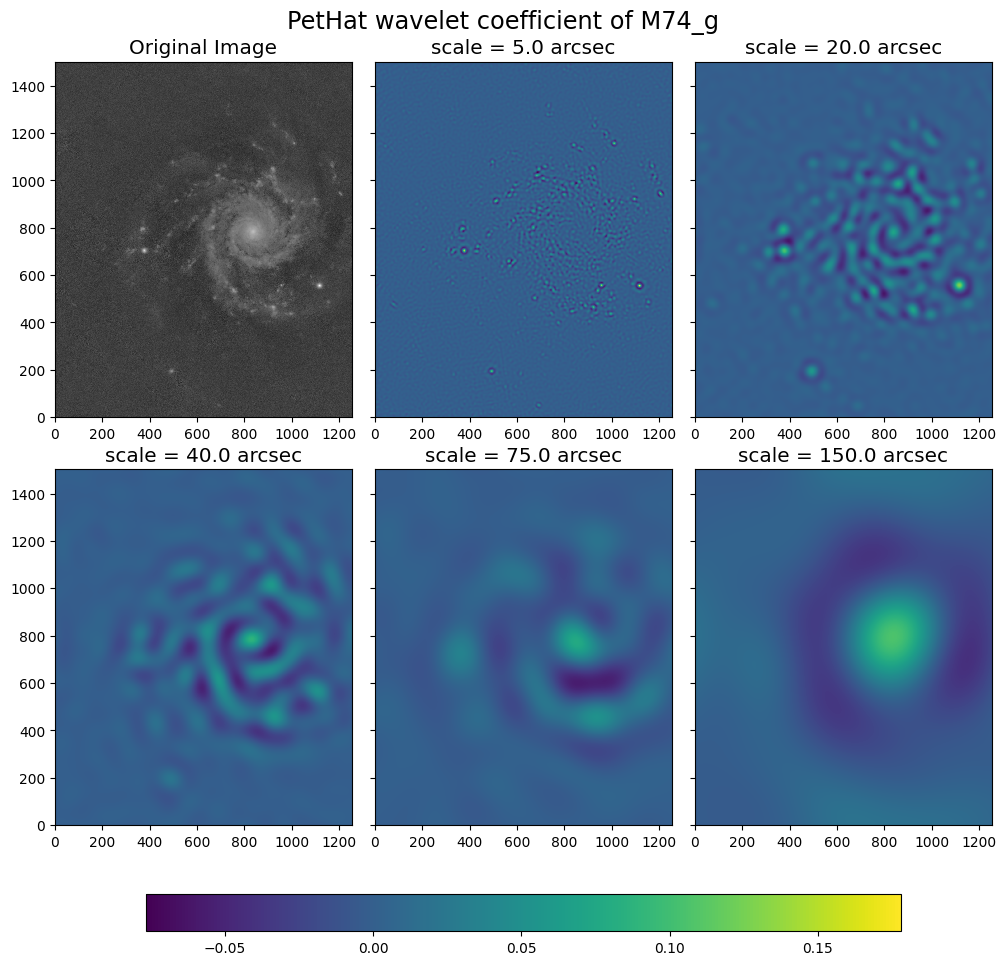

In [5]:
unit = 'arcsec'
fig = plt.figure(layout='constrained', figsize=(10, 9.5))
subfigs = fig.subfigures(1, 1, wspace=0.07)
our_data = np.append(np.real(cube_g.cube),[np.real(cube_g.original)],axis=0)
axes = subfigs.subplots(2, 3, sharey=True)
ax = axes[0][0]
im = ax.imshow(our_data[5], origin='lower', interpolation='nearest', cmap='gray', vmin=0, vmax=1)
ax.set_title('Original Image', fontsize='x-large')
for i in range(len(cube_g.scales)):
    ax = axes[(i+1)//3][(i+1)%3]
    im = ax.imshow(our_data[i], origin='lower', interpolation='nearest', vmin=np.min(np.real(cube_g.cube)), vmax=np.max(np.real(cube_g.cube)))
    ax.set_title('scale = '+str(np.round(cube_g.scales[i]*cube_g.unit_conv(unit),3))+' '+ unit, fontsize='x-large')

fig.colorbar(im, shrink=0.8, ax=axes, location='bottom')

fig.suptitle('PetHat wavelet coefficient of '+cube_g.name, fontsize='xx-large')

plt.show()

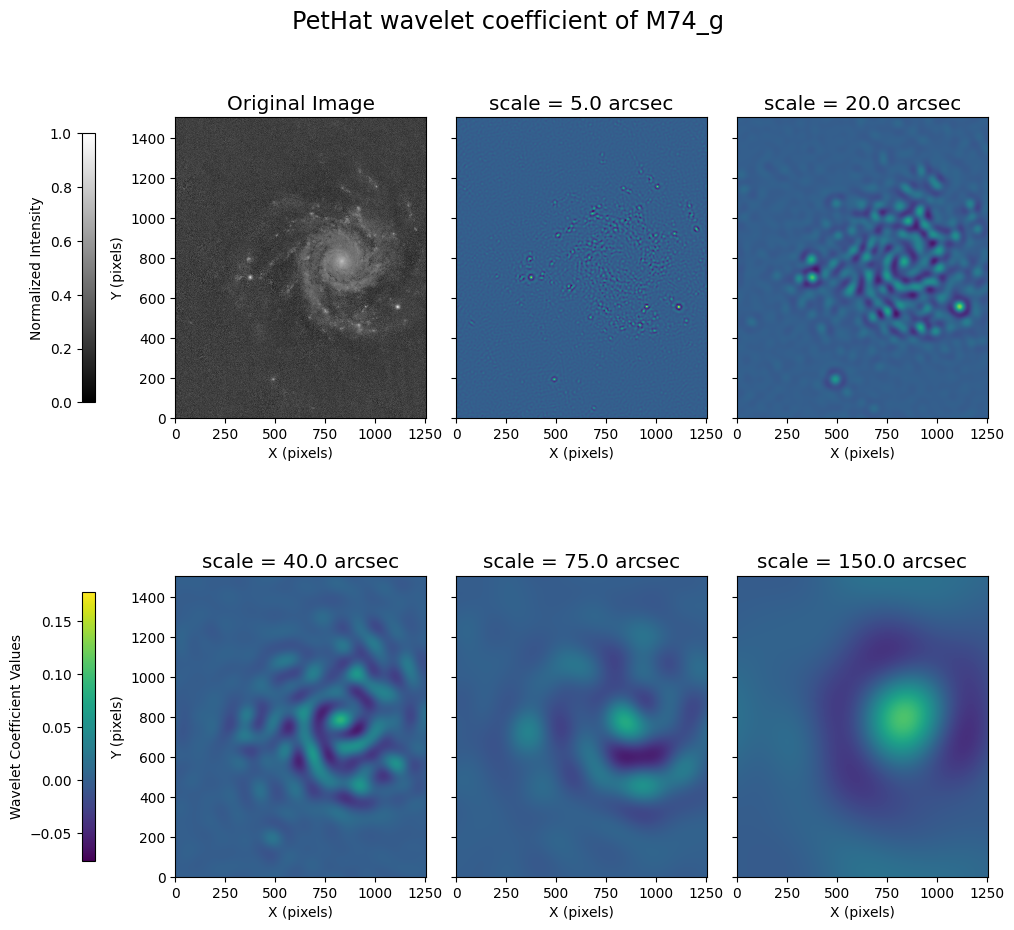

In [7]:
unit = 'arcsec'
fig = plt.figure(layout='constrained', figsize=(10, 9.5))
subfigs = fig.subfigures(1, 1, wspace=0.07)
our_data = np.append(np.real(cube_g.cube),[np.real(cube_g.original)],axis=0)
axes = subfigs.subplots(2, 3, sharey=True)
ax = axes[0][0]
im = ax.imshow(our_data[5], origin='lower', interpolation='nearest', cmap='gray', vmin=0, vmax=1)
cb = fig.colorbar(im, shrink=0.6, ax=ax, location='left')
ax.set_title('Original Image', fontsize='x-large')
ax.set_xlabel("X (pixels)")
ax.set_ylabel("Y (pixels)")
cb.set_label('Normalized Intensity')
for i in range(len(cube_g.scales)):
    ax = axes[(i+1)//3][(i+1)%3]
    im = ax.imshow(our_data[i], origin='lower', interpolation='nearest', vmin=np.min(np.real(cube_g.cube)), vmax=np.max(np.real(cube_g.cube)))
    ax.set_title('scale = '+str(np.round(cube_g.scales[i]*cube_g.unit_conv(unit),3))+' '+ unit, fontsize='x-large')
    ax.set_xlabel("X (pixels)")
    if i==2:
        cb = fig.colorbar(im, shrink=0.6, ax=ax, location='left')
        cb.set_label('Wavelet Coefficient Values')
        ax.set_ylabel("Y (pixels)")


fig.suptitle('PetHat wavelet coefficient of '+cube_g.name, fontsize='xx-large')

plt.show()